In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
plt.style.use('ggplot') 

In [2]:
df=pd.read_csv("World Happiness Report 2024.csv")

In [3]:
df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.350416        0.450662   
1  Afghanistan  2009     4.401778            7.508646        0.552308   
2  Afghanistan  2010     4.758381            7.613900        0.539075   
3  Afghanistan  2011     3.831719            7.581259        0.521104   
4  Afghanistan  2012     3.782938            7.660506        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.500000                      0.718114    0.164055   
1                         50.799999                      0.678896    0.187297   
2                         51.099998                      0.600127    0.117861   
3                         51.400002                      0.495901    0.160098   
4                         51.700001                      0.530935    0.234157   

   Perceptions of corruption  Positive affect  Negative affect  
0                   0.881686         0.414297         0.258195  
1                   0.850035         0.481421         0.237092  
2                   0.706766         0.516907         0.275324  
3                   0.731109         0.479835         0.267175  
4                   0.775620         0.613513         0.267919

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [5]:
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  2363.000000  2363.000000         2335.000000     2350.000000   
mean   2014.763860     5.483562            9.399673        0.809369   
std       5.059436     1.125523            1.152062        0.121211   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2011.000000     4.646750            8.506165        0.743811   
50%    2015.000000     5.448725            9.502946        0.834395   
75%    2019.000000     6.323592           10.392974        0.903779   
max    2023.000000     8.018934           11.675588        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2300.000000                   2327.000000   
mean                          63.401828                      0.750290   
std                            6.842644                      0.139366   
min                            6.720000                      0.228301   
25%                           59.195001                      0.660706   
50%                           65.099998                      0.771122   
75%                           68.552502                      0.861740   
max                           74.599998                      0.985178   

        Generosity  Perceptions of corruption  Positive affect  \
count  2282.000000                2238.000000      2339.000000   
mean      0.000096                   0.743959         0.651878   
std       0.161386                   0.184871         0.106249   
min      -0.339547                   0.035198         0.178886   
25%      -0.111940                   0.686784         0.571977   
50%      -0.021613                   0.798497         0.663420   
75%       0.093569                   0.867557         0.737262   
max       0.699570                   0.983276         0.883586   

       Negative affect  
count      2347.000000  
mean          0.273160  
std           0.087133  
min           0.082737  
25%           0.208559  
50%           0.262175  
75%           0.326211  
max           0.704590

In [6]:
print(df.isnull().sum())

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


In [7]:
df['Log GDP per capita'].fillna(df['Log GDP per capita'].mean(),inplace=True)

C:\Users\yasha\AppData\Local\Temp\ipykernel_34932\2303141127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Log GDP per capita'].fillna(df['Log GDP per capita'].mean(),inplace=True)


In [8]:
df

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
1     Afghanistan  2009     4.401778            7.508646        0.552308   
2     Afghanistan  2010     4.758381            7.613900        0.539075   
3     Afghanistan  2011     3.831719            7.581259        0.521104   
4     Afghanistan  2012     3.782938            7.660506        0.520637   
...           ...   ...          ...                 ...             ...   
2358     Zimbabwe  2019     2.693523            7.697755        0.759162   
2359     Zimbabwe  2020     3.159802            7.596050        0.717243   
2360     Zimbabwe  2021     3.154578            7.656878        0.685151   
2361     Zimbabwe  2022     3.296220            7.670073        0.666172   
2362     Zimbabwe  2023     3.572386            7.678590        0.693817   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            50.500000                      0.718114   
1                            50.799999                      0.678896   
2                            51.099998                      0.600127   
3                            51.400002                      0.495901   
4                            51.700001                      0.530935   
...                                ...                           ...   
2358                         53.099998                      0.631908   
2359                         53.575001                      0.643303   
2360                         54.049999                      0.667636   
2361                         54.525002                      0.651987   
2362                         55.000000                      0.734613   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0       0.164055                   0.881686         0.414297         0.258195  
1       0.187297                   0.850035         0.481421         0.237092  
2       0.117861                   0.706766         0.516907         0.275324  
3       0.160098                   0.731109         0.479835         0.267175  
4       0.234157                   0.775620         0.613513         0.267919  
...          ...                        ...              ...              ...  
2358   -0.050874                   0.830652         0.658434         0.235354  
2359    0.002848                   0.788523         0.660658         0.345736  
2360   -0.079007                   0.756945         0.609917         0.241682  
2361   -0.072935                   0.752632         0.640609         0.191350  
2362   -0.068837                   0.757494         0.609752         0.178953  

[2363 rows x 11 columns]

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
1     Afghanistan  2009     4.401778            7.508646        0.552308   
2     Afghanistan  2010     4.758381            7.613900        0.539075   
3     Afghanistan  2011     3.831719            7.581259        0.521104   
4     Afghanistan  2012     3.782938            7.660506        0.520637   
...           ...   ...          ...                 ...             ...   
2358     Zimbabwe  2019     2.693523            7.697755        0.759162   
2359     Zimbabwe  2020     3.159802            7.596050        0.717243   
2360     Zimbabwe  2021     3.154578            7.656878        0.685151   
2361     Zimbabwe  2022     3.296220            7.670073        0.666172   
2362     Zimbabwe  2023     3.572386            7.678590        0.693817   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            50.500000                      0.718114   
1                            50.799999                      0.678896   
2                            51.099998                      0.600127   
3                            51.400002                      0.495901   
4                            51.700001                      0.530935   
...                                ...                           ...   
2358                         53.099998                      0.631908   
2359                         53.575001                      0.643303   
2360                         54.049999                      0.667636   
2361                         54.525002                      0.651987   
2362                         55.000000                      0.734613   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0       0.164055                   0.881686         0.414297         0.258195  
1       0.187297                   0.850035         0.481421         0.237092  
2       0.117861                   0.706766         0.516907         0.275324  
3       0.160098                   0.731109         0.479835         0.267175  
4       0.234157                   0.775620         0.613513         0.267919  
...          ...                        ...              ...              ...  
2358   -0.050874                   0.830652         0.658434         0.235354  
2359    0.002848                   0.788523         0.660658         0.345736  
2360   -0.079007                   0.756945         0.609917         0.241682  
2361   -0.072935                   0.752632         0.640609         0.191350  
2362   -0.068837                   0.757494         0.609752         0.178953  

[2363 rows x 11 columns]

In [11]:
df.rename(columns={'Life Ladder':"happiness Score",'Log GDP per capita':"GDP"},inplace=True)

In [12]:
df

Country name  year  happiness Score       GDP  Social support  \
0     Afghanistan  2008         3.723590  7.350416        0.450662   
1     Afghanistan  2009         4.401778  7.508646        0.552308   
2     Afghanistan  2010         4.758381  7.613900        0.539075   
3     Afghanistan  2011         3.831719  7.581259        0.521104   
4     Afghanistan  2012         3.782938  7.660506        0.520637   
...           ...   ...              ...       ...             ...   
2358     Zimbabwe  2019         2.693523  7.697755        0.759162   
2359     Zimbabwe  2020         3.159802  7.596050        0.717243   
2360     Zimbabwe  2021         3.154578  7.656878        0.685151   
2361     Zimbabwe  2022         3.296220  7.670073        0.666172   
2362     Zimbabwe  2023         3.572386  7.678590        0.693817   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            50.500000                      0.718114   
1                            50.799999                      0.678896   
2                            51.099998                      0.600127   
3                            51.400002                      0.495901   
4                            51.700001                      0.530935   
...                                ...                           ...   
2358                         53.099998                      0.631908   
2359                         53.575001                      0.643303   
2360                         54.049999                      0.667636   
2361                         54.525002                      0.651987   
2362                         55.000000                      0.734613   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
0       0.164055                   0.881686         0.414297         0.258195  
1       0.187297                   0.850035         0.481421         0.237092  
2       0.117861                   0.706766         0.516907         0.275324  
3       0.160098                   0.731109         0.479835         0.267175  
4       0.234157                   0.775620         0.613513         0.267919  
...          ...                        ...              ...              ...  
2358   -0.050874                   0.830652         0.658434         0.235354  
2359    0.002848                   0.788523         0.660658         0.345736  
2360   -0.079007                   0.756945         0.609917         0.241682  
2361   -0.072935                   0.752632         0.640609         0.191350  
2362   -0.068837                   0.757494         0.609752         0.178953  

[2363 rows x 11 columns]

In [13]:
df['year']=df['year'].astype(int)

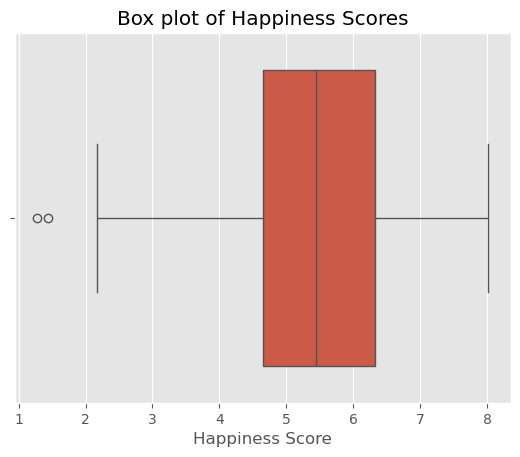

In [14]:
sns.boxplot(x=df['happiness Score'],data=df)
plt.title("Box plot of Happiness Scores")
plt.xlabel("Happiness Score")
plt.show()

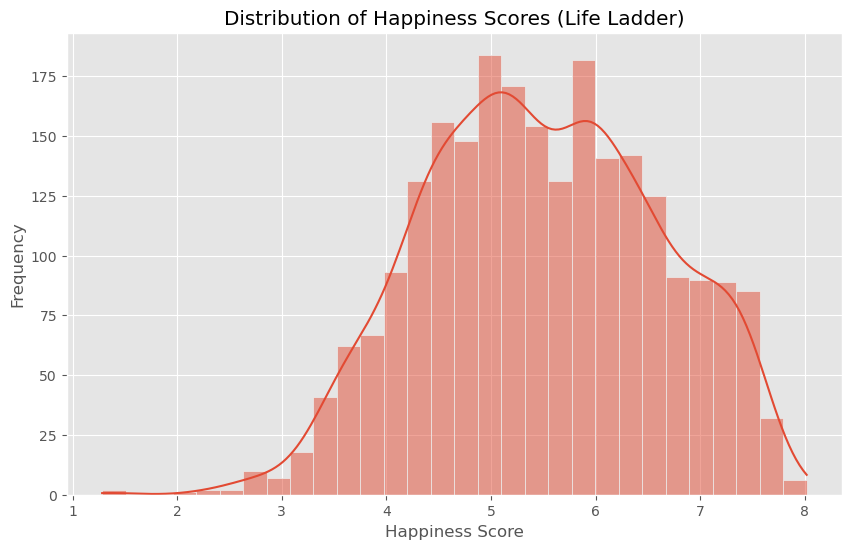

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['happiness Score'], bins=30, kde=True)
plt.title('Distribution of Happiness Scores (Life Ladder)')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


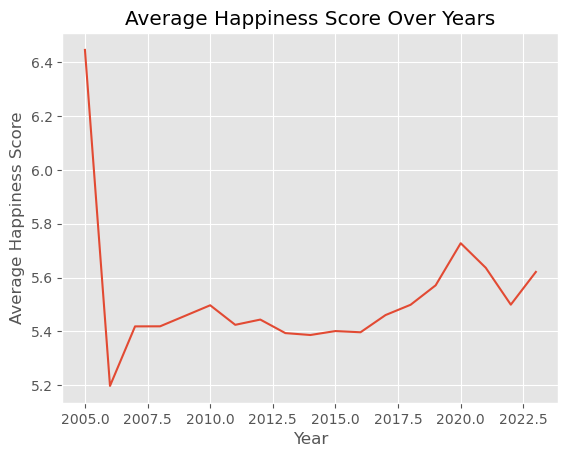

In [16]:
# Average Happiness score by year


average_happiness_by_year=df.groupby('year')["happiness Score"].mean()
average_happiness_by_year.plot(title="Average Happiness Score Over Years")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.show()

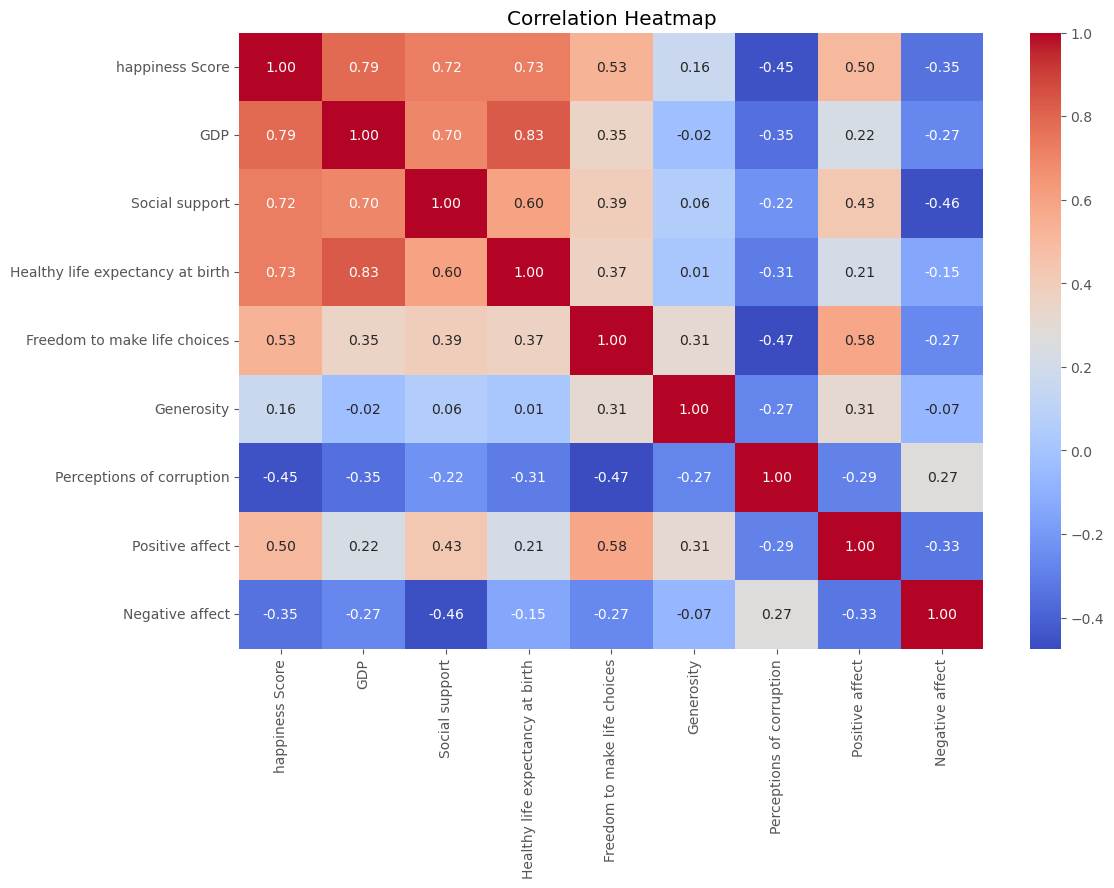

In [17]:
#selecting the numeric data types only forthe corr method
numeric_data = df.select_dtypes(include=['float64', 'int64'])
numeric_data = numeric_data.dropna()
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

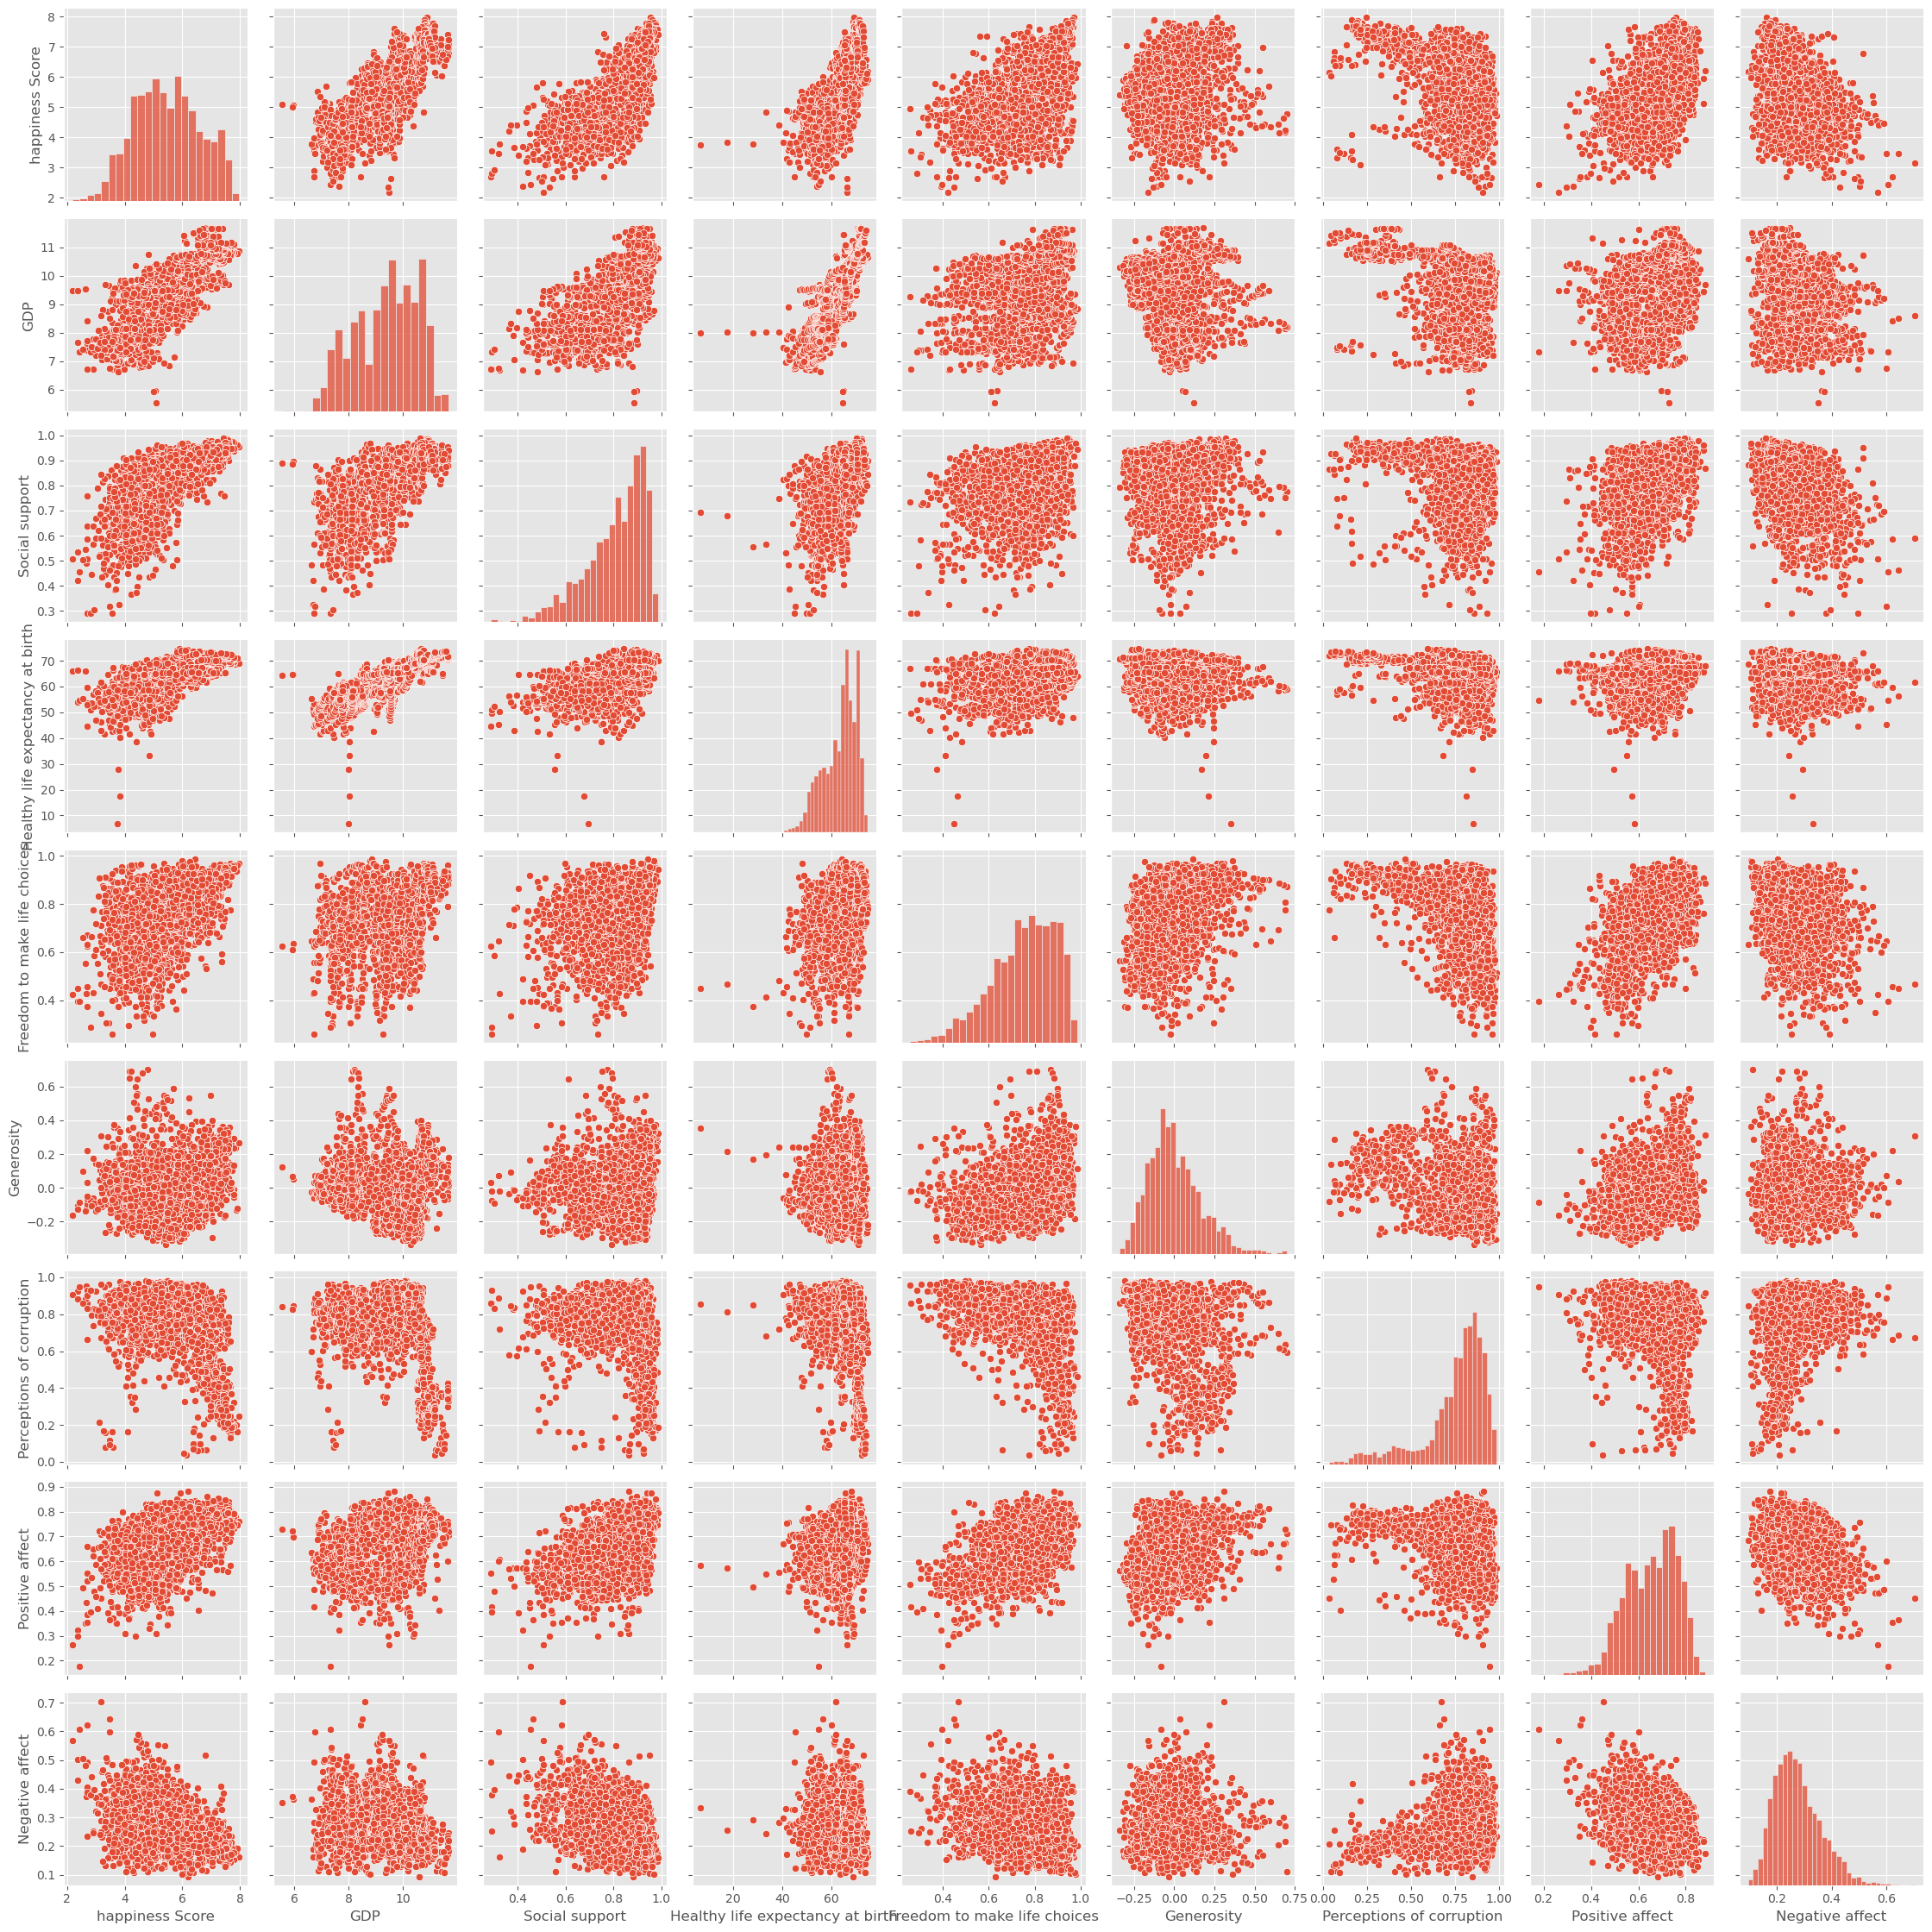

In [18]:
sns.pairplot(numeric_data)
plt.tight_layout()
plt.show()

In [19]:
top_countries=df.groupby("Country name")['happiness Score'].mean().sort_values(ascending=False).head(10)
print(top_countries)

Country name
Denmark        7.664026
Finland        7.624132
Iceland        7.467971
Norway         7.463886
Netherlands    7.440393
Switzerland    7.435587
Sweden         7.365232
Canada         7.296854
New Zealand    7.260700
Australia      7.242307
Name: happiness Score, dtype: float64


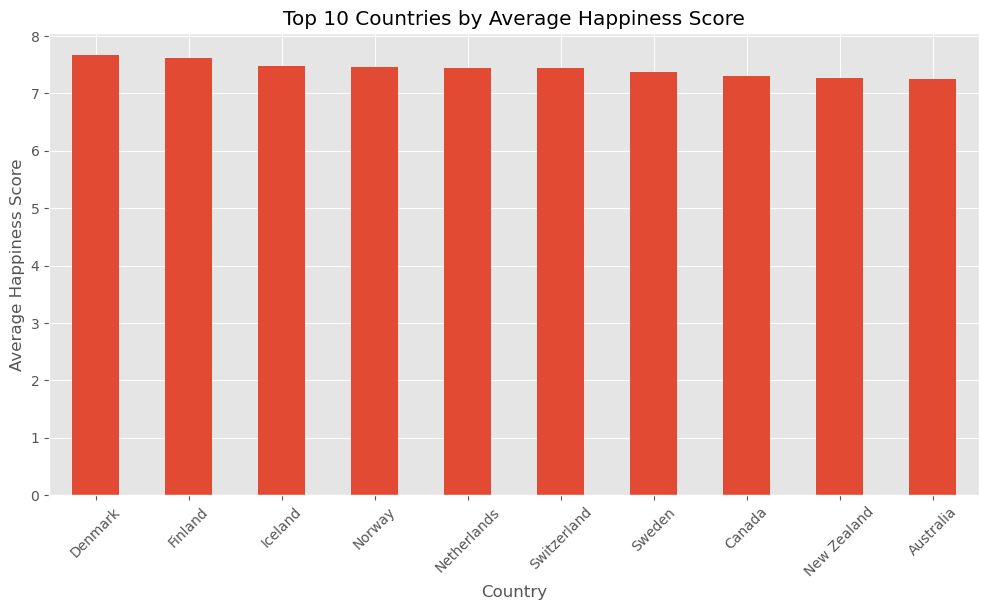

In [20]:
plt.figure(figsize=(12,6))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Average Happiness Score")
plt.xlabel("Country")
plt.ylabel("Average Happiness Score")
plt.xticks(rotation=45)
plt.show()

In [21]:
bottom_countries=df.groupby("Country name")['happiness Score'].mean().sort_values(ascending=True).head(10)
print(bottom_countries)

Country name
Afghanistan                 3.219917
South Sudan                 3.401875
Central African Republic    3.514954
Burundi                     3.548124
Rwanda                      3.654473
Tanzania                    3.710983
Togo                        3.719667
Zimbabwe                    3.792418
Lesotho                     3.839793
Comoros                     3.849630
Name: happiness Score, dtype: float64


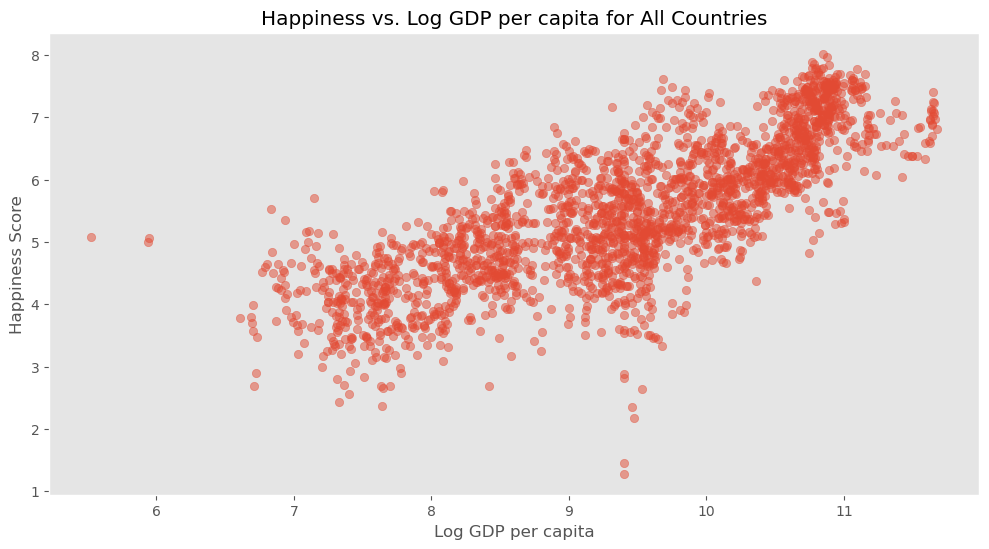

In [22]:
# HAPPINESS VS LOG GDP PER CAPITA
plt.figure(figsize=(12,6))
plt.scatter(df['GDP'],df['happiness Score'],alpha=0.5)
plt.title("Happiness vs. Log GDP per capita for All Countries")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()

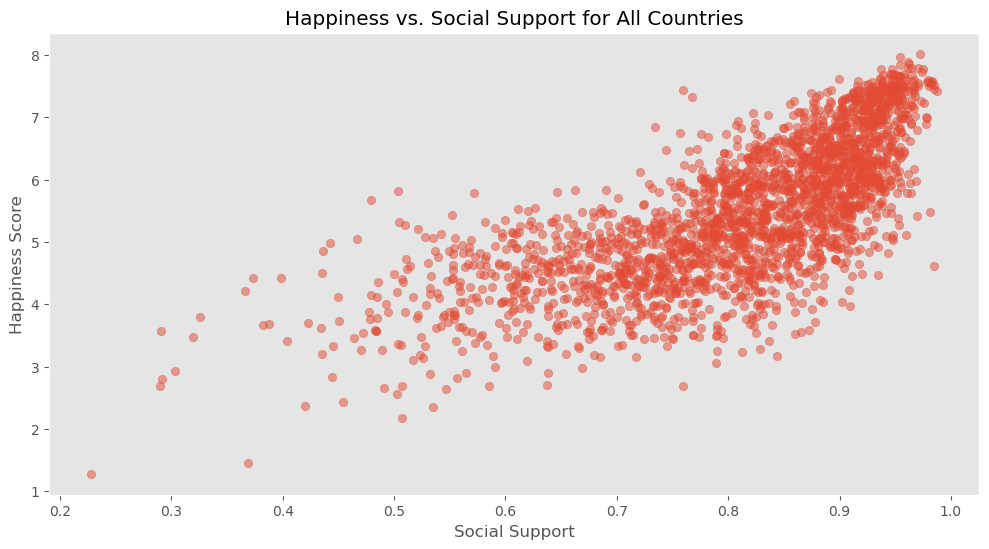

In [23]:
#HAPPINESS VS SOCIAL SUPPORT
plt.figure(figsize=(12, 6))
plt.scatter(df['Social support'], df['happiness Score'], alpha=0.5)
plt.title("Happiness vs. Social Support for All Countries")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()


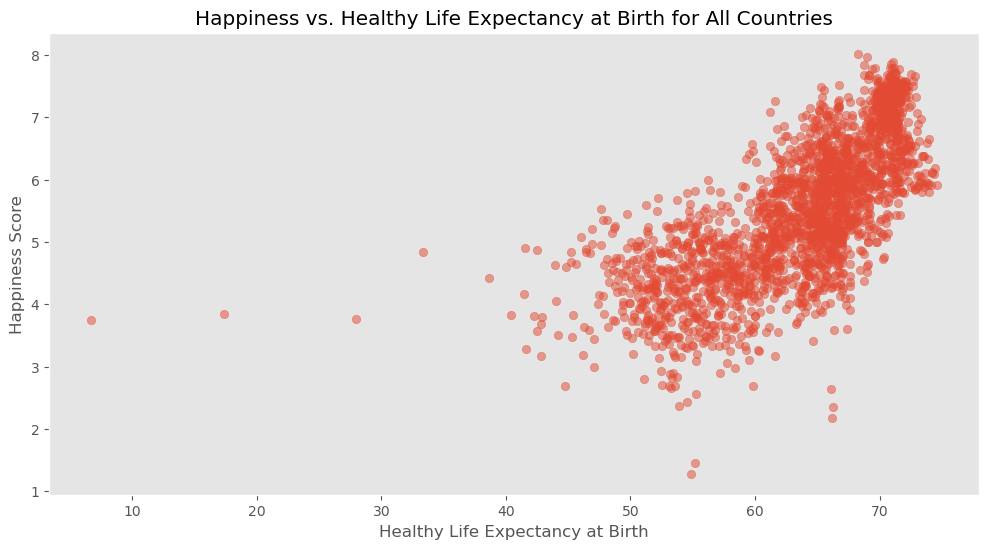

In [24]:
# HAPPINESS VS HEALTHY LIFE EXPECTANCY AT BIRTH
plt.figure(figsize=(12, 6))
plt.scatter(df['Healthy life expectancy at birth'], df['happiness Score'], alpha=0.5)
plt.title("Happiness vs. Healthy Life Expectancy at Birth for All Countries")
plt.xlabel("Healthy Life Expectancy at Birth")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()


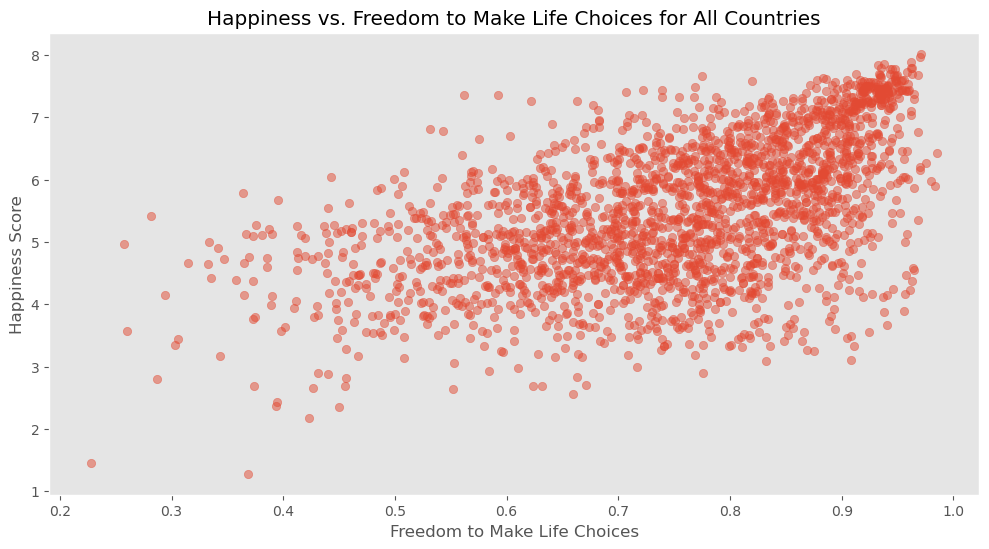

In [25]:
#HAPPINESS VS FREEDOM TO MAKE LIFE CHOICES 
plt.figure(figsize=(12, 6))
plt.scatter(df['Freedom to make life choices'], df['happiness Score'], alpha=0.5)
plt.title("Happiness vs. Freedom to Make Life Choices for All Countries")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()


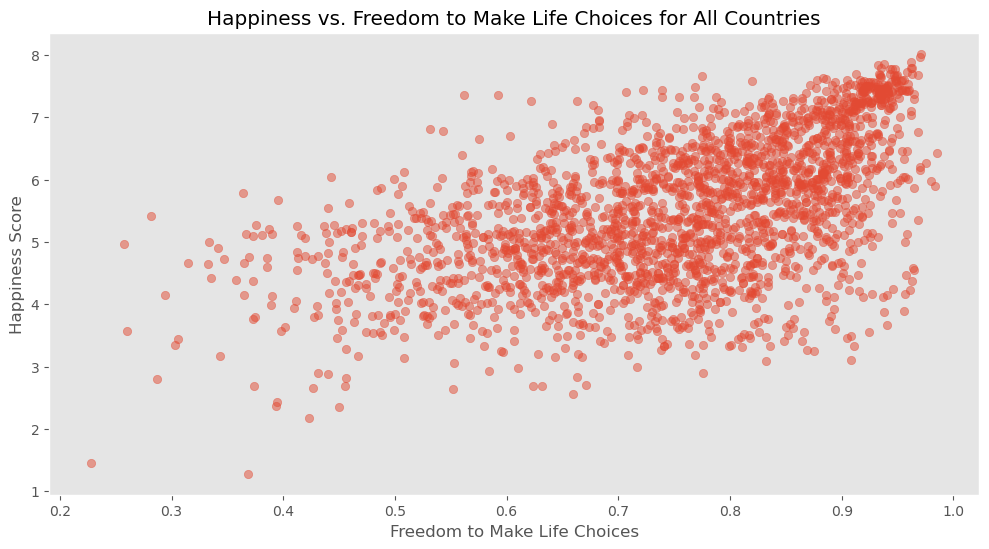

In [26]:
# HAPPINESS VS GENOROSITY
plt.figure(figsize=(12, 6))
plt.scatter(df['Freedom to make life choices'], df['happiness Score'], alpha=0.5)
plt.title("Happiness vs. Freedom to Make Life Choices for All Countries")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()


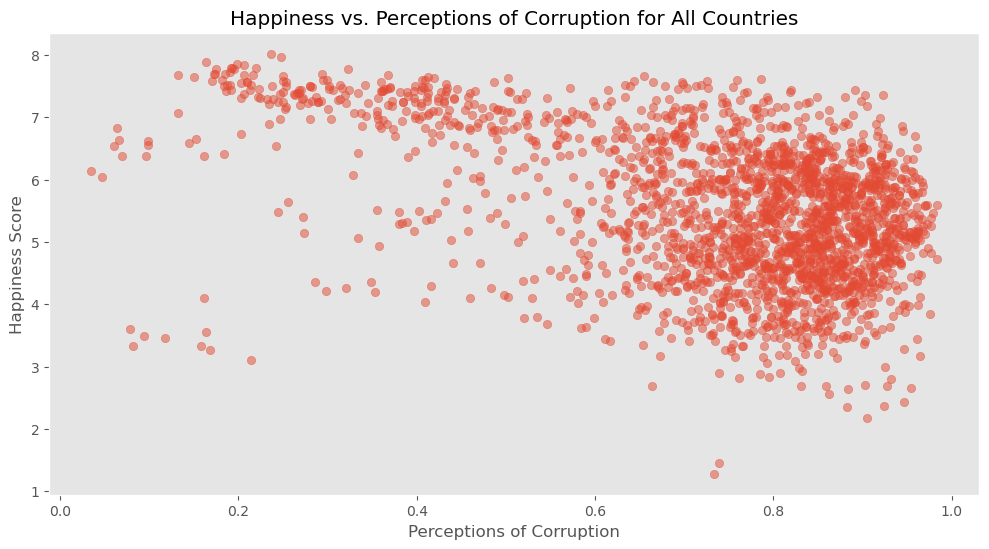

In [27]:
#HAPPINESS VS PERCEPTION OF CORRUPTION
plt.figure(figsize=(12, 6))
plt.scatter(df['Perceptions of corruption'], df['happiness Score'], alpha=0.5)
plt.title("Happiness vs. Perceptions of Corruption for All Countries")
plt.xlabel("Perceptions of Corruption")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()


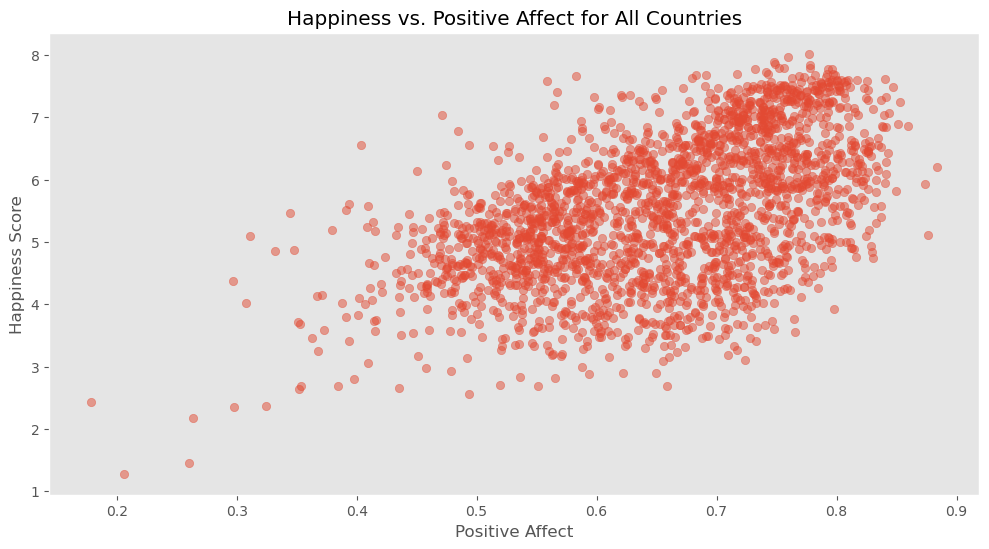

In [28]:
# HAPPINESS VS POSITIVE AFFECT
plt.figure(figsize=(12, 6))
plt.scatter(df['Positive affect'], df['happiness Score'], alpha=0.5)
plt.title("Happiness vs. Positive Affect for All Countries")
plt.xlabel("Positive Affect")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()


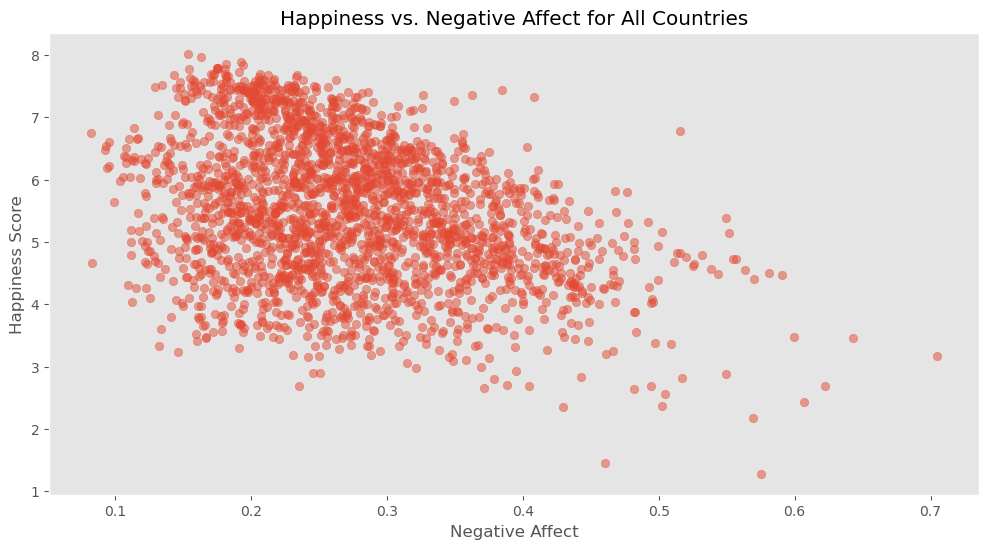

In [29]:
# HAPPINESS VS THE NEGATIVE AFFECT
plt.figure(figsize=(12, 6))
plt.scatter(df['Negative affect'], df['happiness Score'], alpha=0.5)
plt.title("Happiness vs. Negative Affect for All Countries")
plt.xlabel("Negative Affect")
plt.ylabel("Happiness Score")
plt.grid()
plt.show()


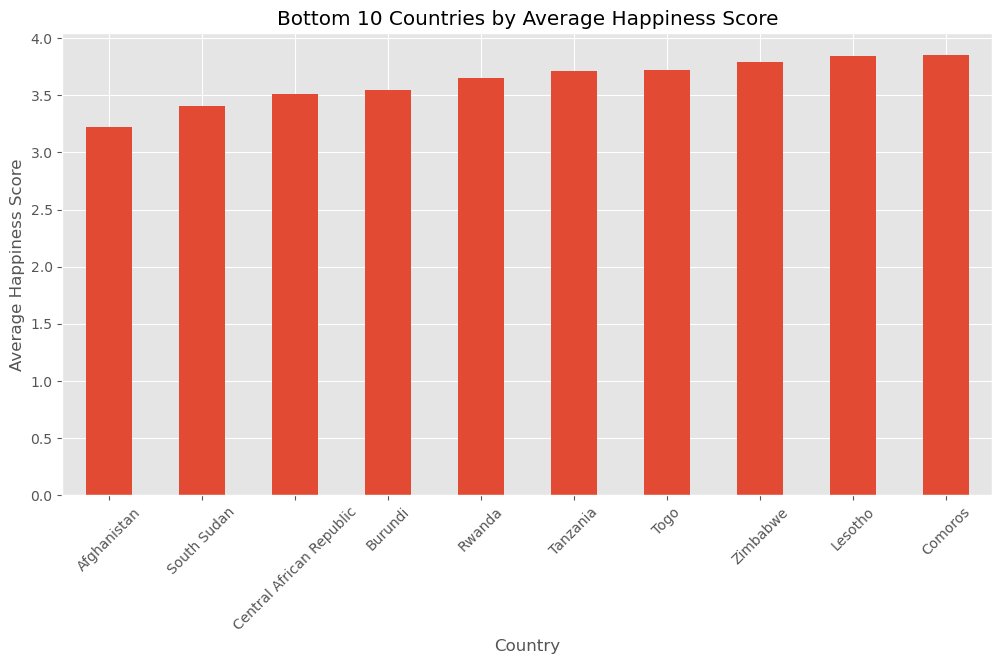

In [30]:
plt.figure(figsize=(12,6))
bottom_countries.plot(kind='bar')
plt.title("Bottom 10 Countries by Average Happiness Score")
plt.xlabel("Country")
plt.ylabel("Average Happiness Score")
plt.xticks(rotation=45)
plt.show()

In [31]:
countries_to_compare=['Denmark','Afghanistan']
subset=df[df['Country name'].isin(countries_to_compare)]

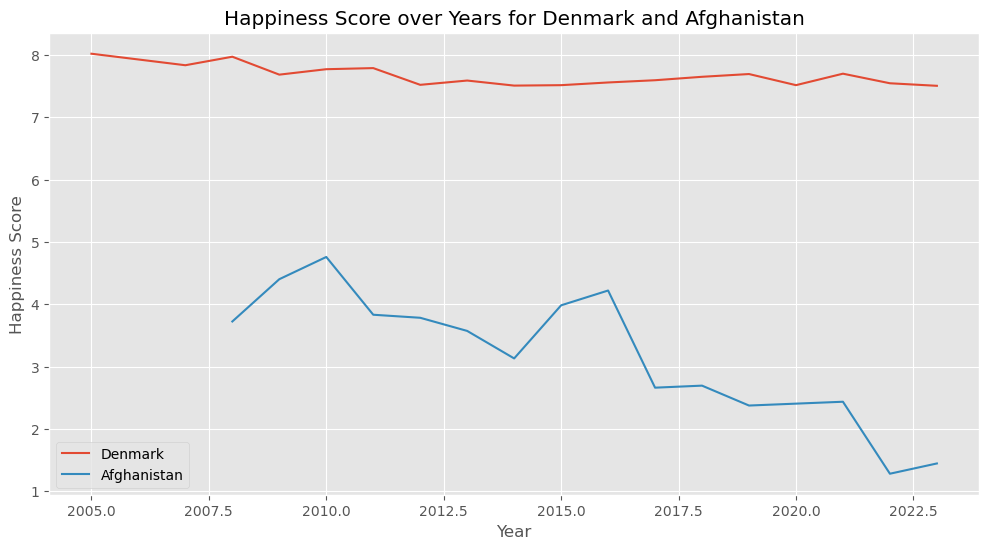

In [32]:
plt.figure(figsize=(12, 6))
for country in countries_to_compare:
    plt.plot(subset[subset['Country name'] == country]['year'],  
             subset[subset['Country name'] == country]['happiness Score'],  
             label=country)  

plt.title("Happiness Score over Years for Denmark and Afghanistan")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()


In [33]:
# Calculate average happiness scores by country
avg_happiness=df.groupby('Country name')['happiness Score'].mean()
# Sort and get top 5 and bottom 5 countries
top_countries=avg_happiness.sort_values(ascending=False).head(5)
bottom_countries=avg_happiness.sort_values(ascending=True).head(5)

#comining the two categories
selected_countries=pd.concat([top_countries,bottom_countries])


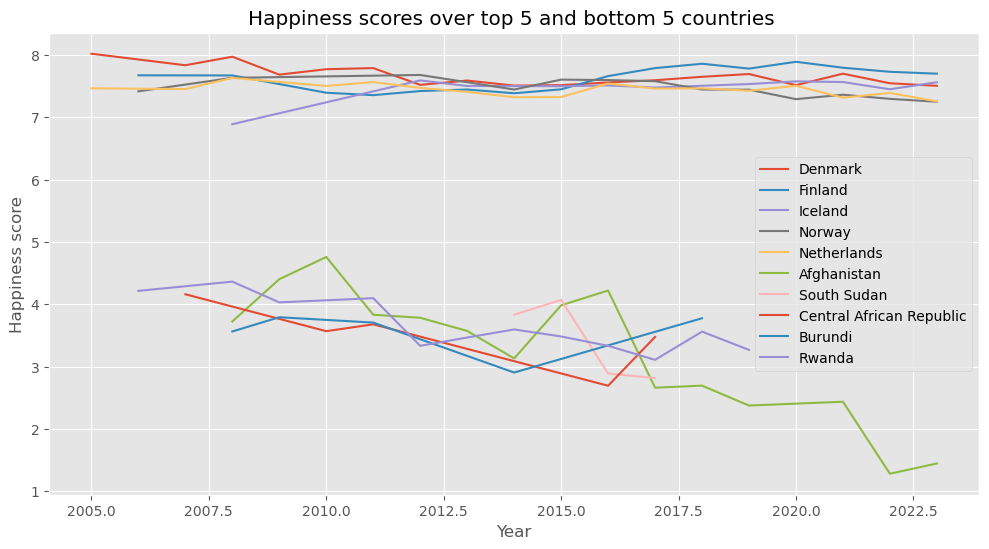

In [34]:
plt.figure(figsize=(12,6))
for country in selected_countries.index:
    plt.plot(df[df['Country name']==country]['year'],
            df[df['Country name']==country]['happiness Score'],
            label=country)
plt.title("Happiness scores over top 5 and bottom 5 countries ")
plt.xlabel("Year")
plt.ylabel("Happiness score")
plt.legend()
plt.show()

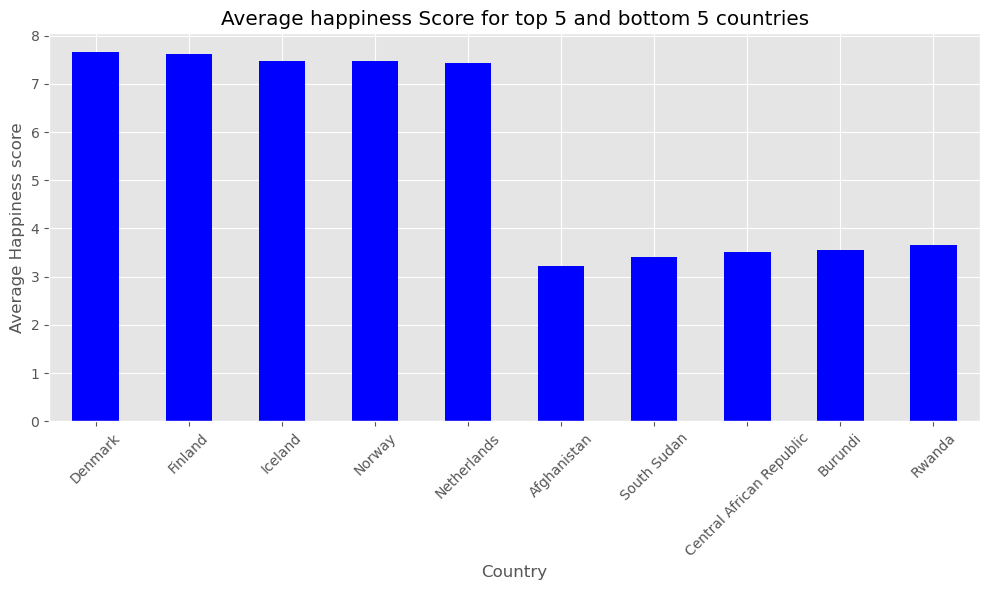

In [35]:
plt.figure(figsize=(10,6))
selected_countries.plot(kind='bar', color=['blue' if score >= 0 else 'red' for score in selected_countries],
                         legend=False)
plt.title("Average happiness Score for top 5 and bottom 5 countries")
plt.xlabel("Country")
plt.ylabel("Average Happiness score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

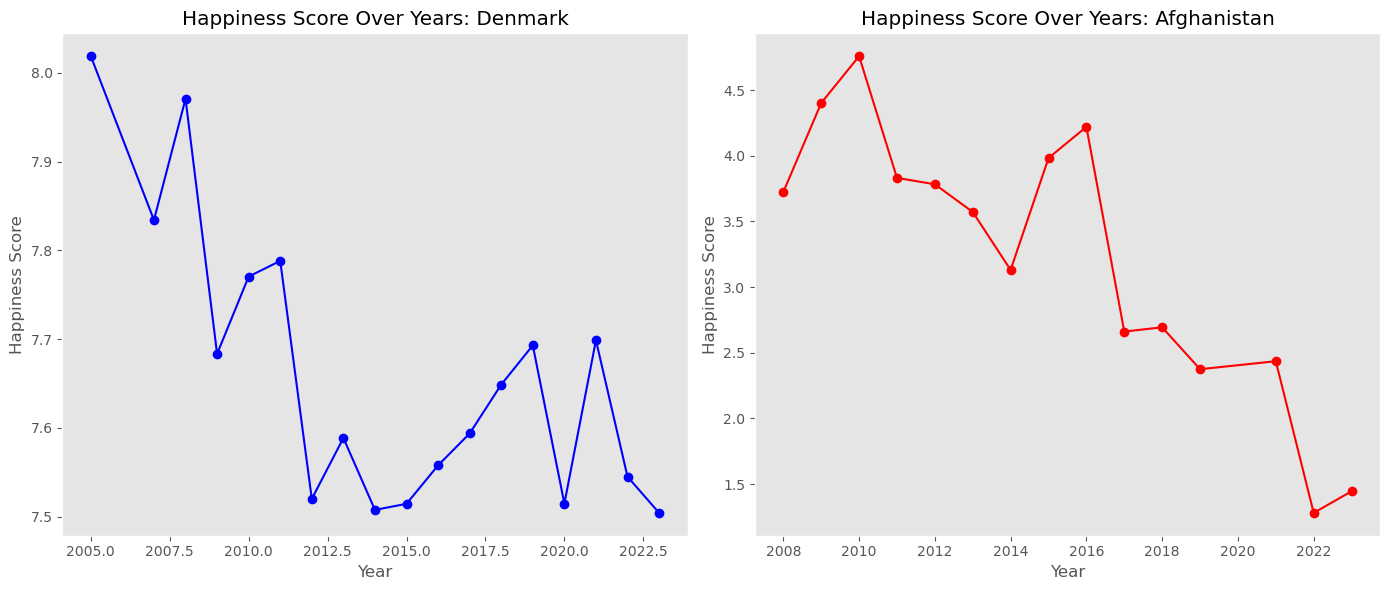

In [36]:
# Filter data for Denmark and Afghanistan
denmark_data = df[df['Country name'] == 'Denmark']
afghanistan_data = df[df['Country name'] == 'Afghanistan']


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Denmark subplot
axes[0].plot(denmark_data['year'], denmark_data['happiness Score'], marker='o', color='blue')
axes[0].set_title('Happiness Score Over Years: Denmark')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Happiness Score')
axes[0].grid()

# Afghanistan subplot
axes[1].plot(afghanistan_data['year'], afghanistan_data['happiness Score'], marker='o', color='red')
axes[1].set_title('Happiness Score Over Years: Afghanistan')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Happiness Score')
axes[1].grid()

plt.tight_layout()
plt.show()


In [37]:
top_countries=df.groupby('Country name')['happiness Score'].mean().nlargest(5).index
bottom_countries=df.groupby('Country name')['happiness Score'].mean().nsmallest(5).index


selected_countries=list(top_countries)+list(bottom_countries)
subset=df[df['Country name'].isin(selected_countries)]

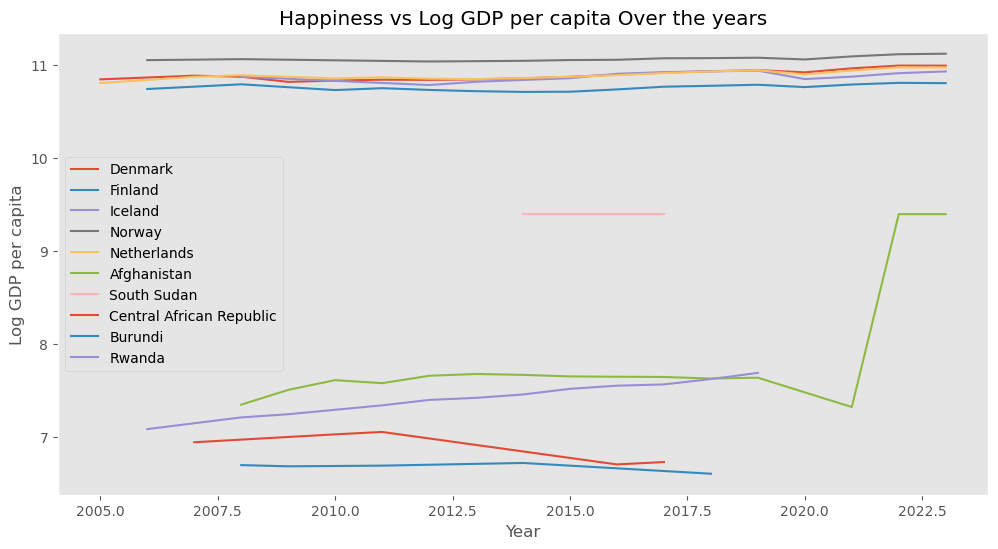

In [38]:
# HAPPINESS VS GDP
plt.figure(figsize=(12,6))
for country in selected_countries:
    country_data=subset[subset["Country name"]==country]
    plt.plot(country_data['year'],country_data["GDP"],label=country)
plt.title("Happiness vs Log GDP per capita Over the years")
plt.xlabel("Year")
plt.ylabel("Log GDP per capita")
plt.legend()
plt.grid()
plt.show()

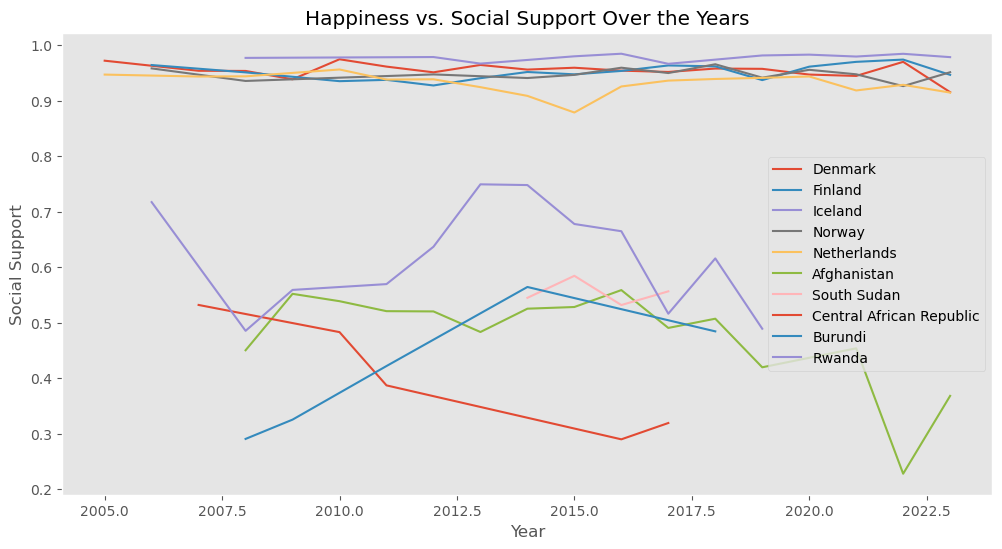

In [39]:
# HAPPINESS VS SOCIAL SUPPORT
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = subset[subset['Country name'] == country]
    plt.plot(country_data['year'], country_data['Social support'], label=country)
plt.title("Happiness vs. Social Support Over the Years")
plt.xlabel("Year")
plt.ylabel("Social Support")
plt.legend()
plt.grid()
plt.show()


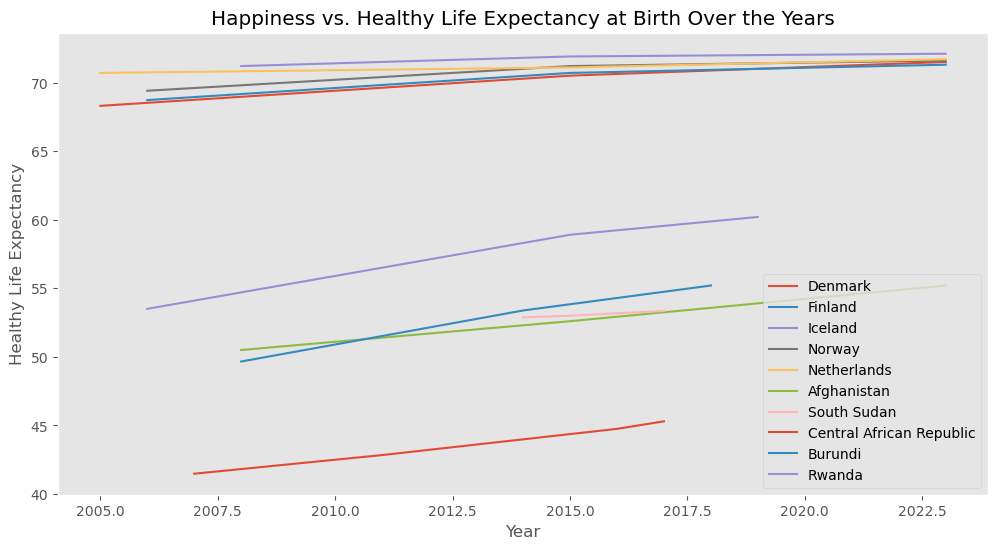

In [40]:
# HAPPINESS VS HEALTHY LIFE EXPECTANCY AT BIRTH
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = subset[subset['Country name'] == country]
    plt.plot(country_data['year'], country_data['Healthy life expectancy at birth'], label=country)
plt.title("Happiness vs. Healthy Life Expectancy at Birth Over the Years")
plt.xlabel("Year")
plt.ylabel("Healthy Life Expectancy")
plt.legend()
plt.grid()
plt.show()


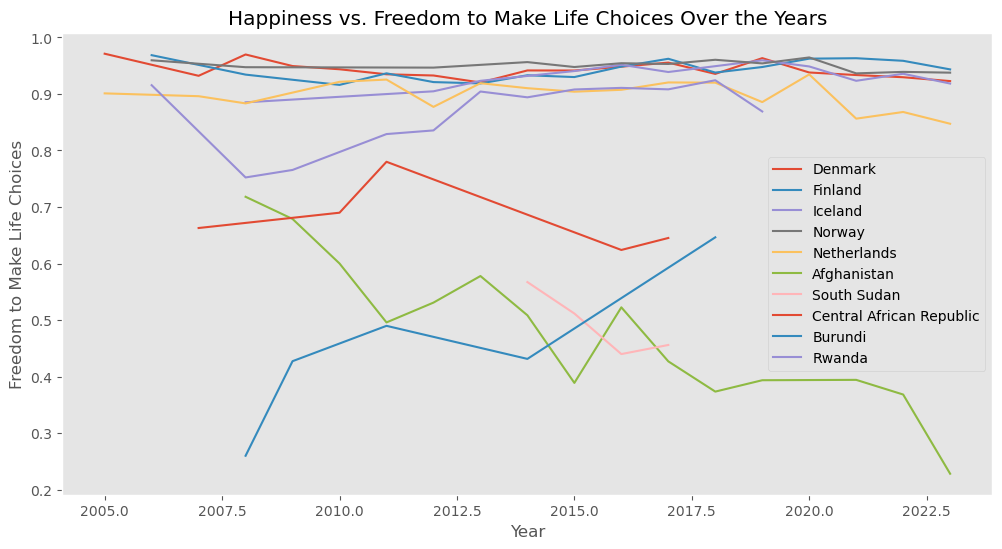

In [41]:
# HAPPINESS VS FREEDOM TO MAKE LIFE CHOICES 
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = subset[subset['Country name'] == country]
    plt.plot(country_data['year'], country_data['Freedom to make life choices'], label=country)
plt.title("Happiness vs. Freedom to Make Life Choices Over the Years")
plt.xlabel("Year")
plt.ylabel("Freedom to Make Life Choices")
plt.legend()
plt.grid()
plt.show()


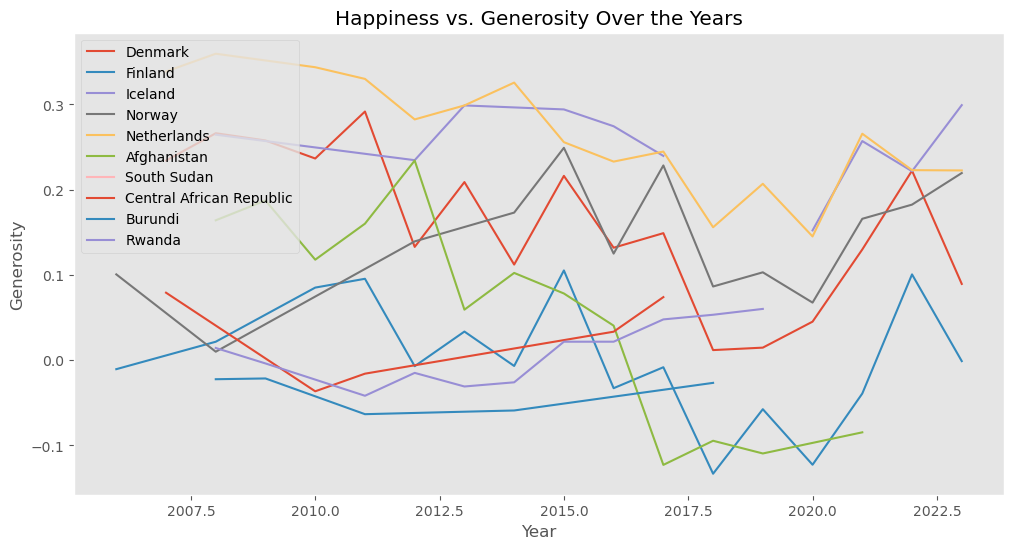

In [42]:
# HAPPINESS VS GENEROSITY
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = subset[subset['Country name'] == country]
    plt.plot(country_data['year'], country_data['Generosity'], label=country)
plt.title("Happiness vs. Generosity Over the Years")
plt.xlabel("Year")
plt.ylabel("Generosity")
plt.legend()
plt.grid()
plt.show()


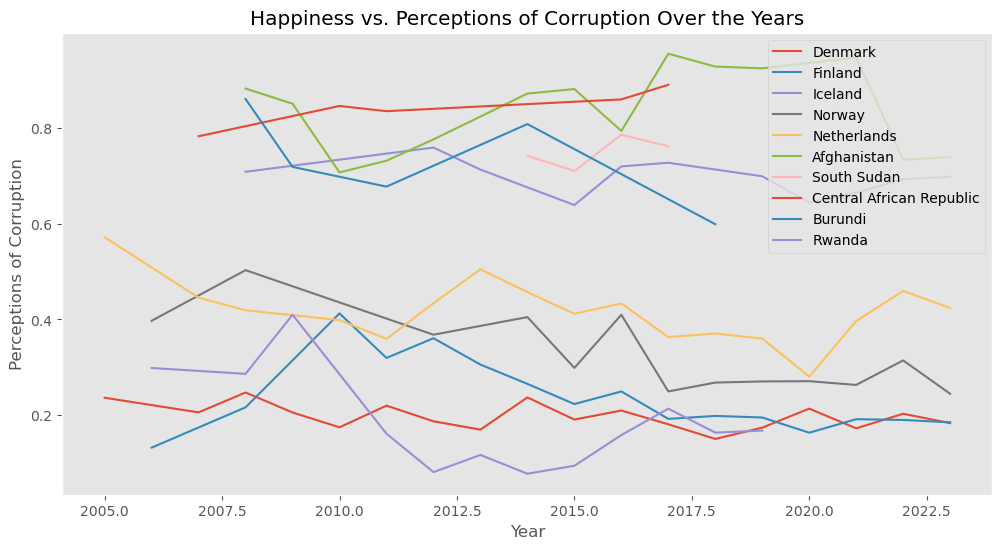

In [43]:
# HAPPINESS VS PERCEPTIONS OF CORRUPTIONS
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = subset[subset['Country name'] == country]
    plt.plot(country_data['year'], country_data['Perceptions of corruption'], label=country)
plt.title("Happiness vs. Perceptions of Corruption Over the Years")
plt.xlabel("Year")
plt.ylabel("Perceptions of Corruption")
plt.legend()
plt.grid()
plt.show()


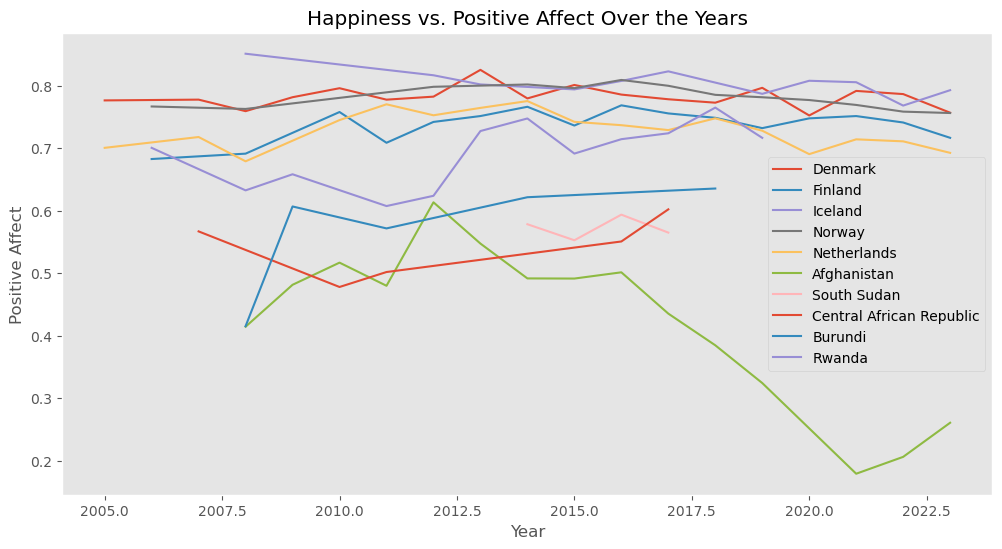

In [44]:
# HAPPINESS VS POSITIVE AFFECT
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = subset[subset['Country name'] == country]
    plt.plot(country_data['year'], country_data['Positive affect'], label=country)
plt.title("Happiness vs. Positive Affect Over the Years")
plt.xlabel("Year")
plt.ylabel("Positive Affect")
plt.legend()
plt.grid()
plt.show()


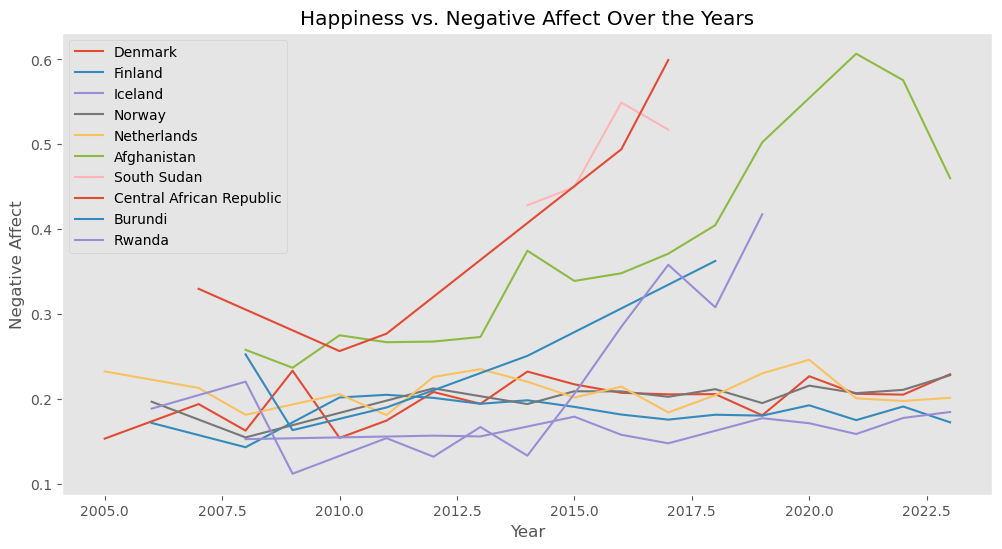

In [45]:
#HAPPINESS VS NEGATIVE AFFECT
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = subset[subset['Country name'] == country]
    plt.plot(country_data['year'], country_data['Negative affect'], label=country)
plt.title("Happiness vs. Negative Affect Over the Years")
plt.xlabel("Year")
plt.ylabel("Negative Affect")
plt.legend()
plt.grid()
plt.show()


In [46]:
# Drop target & irrelevant columns
X = df.drop(columns=['happiness Score', 'Country name', 'year'])
y = df['happiness Score']

In [47]:
# Handle missing values
X = X.fillna(X.mean())

In [48]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [49]:
# Regression models dictionary
regression_models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}


In [50]:
# Train & evaluate models
model_names = []
mae_scores = []
mse_scores = []
r2_scores = []

In [51]:
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_names.append(name)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}")

Linear Regression - MAE: 0.4216, MSE: 0.3042, R²: 0.7579
K-Nearest Neighbors - MAE: 0.3154, MSE: 0.1871, R²: 0.8511
Support Vector Regression - MAE: 0.3517, MSE: 0.2142, R²: 0.8295
Decision Tree - MAE: 0.4075, MSE: 0.3259, R²: 0.7407
Random Forest - MAE: 0.3139, MSE: 0.1754, R²: 0.8604


In [52]:
df_results = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'R² Score': r2_scores
})

C:\Users\yasha\AppData\Local\Temp\ipykernel_34932\1593522440.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=df_results, palette='viridis')


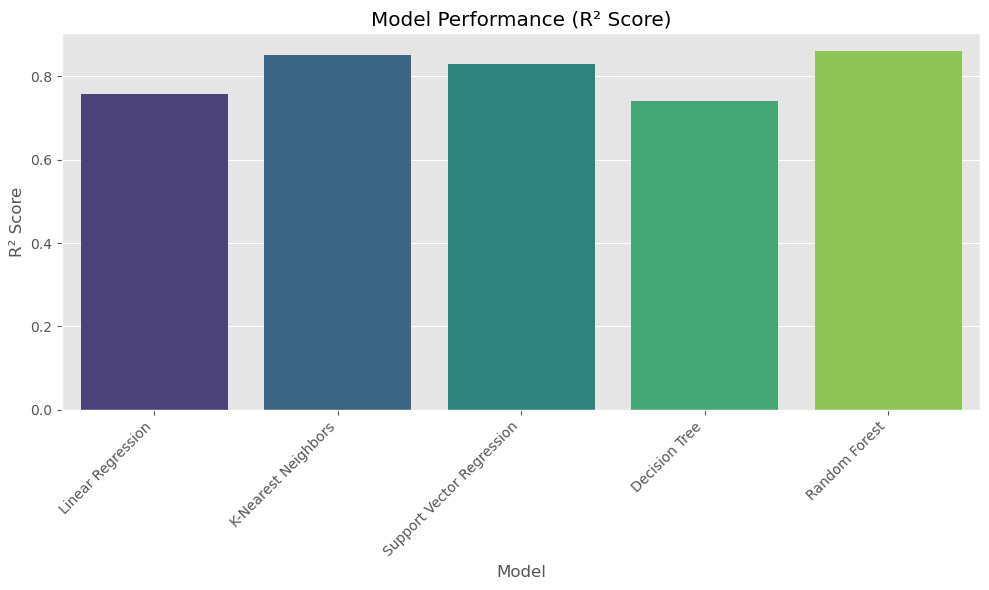

In [53]:
# Plot R² scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R² Score', data=df_results, palette='viridis')
plt.title('Model Performance (R² Score)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
best_index = r2_scores.index(max(r2_scores))
best_model_name = model_names[best_index]
print(f"\nBest Model: {best_model_name} with R² Score: {r2_scores[best_index]:.4f}")


Best Model: Random Forest with R² Score: 0.8604


In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}


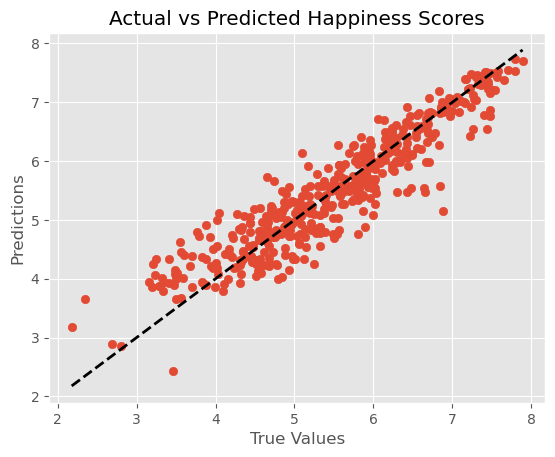

In [56]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()


In [57]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=30, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model with the new hyperparameters
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"New MAE: {mae:.4f}, MSE: {mse:.4f}, R²: {r2:.4f}")


New MAE: 0.3112, MSE: 0.1742, R²: 0.8613


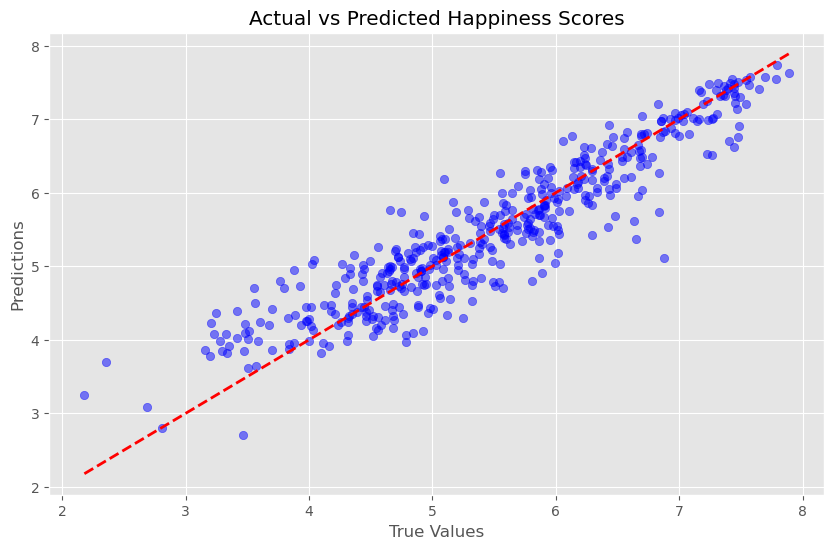

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()


In [59]:
new_country_data = {
    'GDP': [7.5],
    'Social support': [0.8],
    'Healthy life expectancy at birth': [70],
    'Freedom to make life choices': [0.9],
    'Generosity': [0.1],
    'Perceptions of corruption': [0.3],
    'Positive affect': [0.6],
    'Negative affect': [0.2]
}

# Create DataFrame
new_country_df = pd.DataFrame(new_country_data)

# Scale the data using the same scaler from training
new_country_scaled = scaler.transform(new_country_df)

# Predict the happiness score using the trained Random Forest model
predicted_happiness_score = rf_model.predict(new_country_scaled)

# Display the result
print(f"Predicted Happiness Score for Fictionland: {predicted_happiness_score[0]:.4f}")

Predicted Happiness Score for Fictionland: 5.2186
